In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv("data2/0.4/file_0.400000_0.csv")

df2 = pd.read_csv("data2/0.45/file_0.450000_0.csv")

df3 = pd.read_csv("data2/0.35/file_0.350000_0.csv")


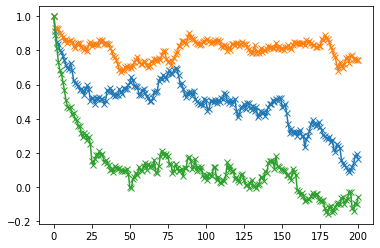

In [27]:
sweeps = df['sweeps']
magnetisation = df['magnetisation']



plt.plot(sweeps, magnetisation, marker='x', linestyle='-')

sweeps = df2['sweeps']
magnetisation = df2['magnetisation']



plt.plot(sweeps, magnetisation, marker='x', linestyle='-')

sweeps = df3['sweeps']
magnetisation = df3['magnetisation']



plt.plot(sweeps, magnetisation, marker='x', linestyle='-')

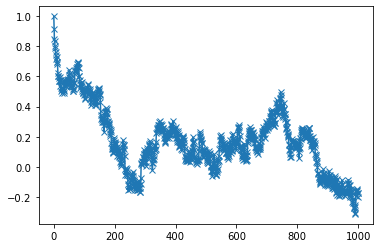

In [28]:
df = pd.read_csv("file_0.400000_0.csv")

sweeps = df['sweeps']
magnetisation = df['magnetisation']

plt.plot(sweeps, magnetisation, marker='x', linestyle='-')


In [73]:
import os

def getLenSweeps(root_folder):
    
    for root, dirs, files in os.walk(root_folder):    

    # get number of sweeps, assumes all numSweeps are the same
        for file_name in files:
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path)
            lenSweeps = len(df['sweeps'])
    
    return lenSweeps

def getNumSeeds(root_folder):
    
    for root, dirs, files in os.walk(root_folder):
        
        num_files = len(files)
        
    
    return num_files

def getError(mean_squares, squared_mean):
    
    n = len(mean_squares)
    
    errors = []
    
    for i in range(n):
        temp_err = 1/(np.sqrt(n -1)) * np.sqrt( mean_squares[i] - squared_mean[i])
        errors.append(temp_err)
    
    return errors
    


def getMag_dict(root_folder):
    
    
    mag_dict = {}
    
    lenSweeps = getLenSweeps(root_folder)
    numSeeds = getNumSeeds(root_folder)    
    
    for root, dirs, files in os.walk(root_folder):
        
        # initialise empty arrays here
        
        sweeps = np.zeros(lenSweeps)
        mean_m = np.zeros(lenSweeps)
        m_squares = np.zeros(lenSweeps)
        
        # m_squares = np.zeros(lenSweeps)
        
        # main loop
        for file_name in files:
            file_path = os.path.join(root, file_name)
            # Here you can perform actions on each file, such as reading its contents
            
            df = pd.read_csv(file_path)
            
            temp_sweeps = df['sweeps']
            temp_m = df['magnetisation']
            
            for i in range(lenSweeps):
                
                sweeps[i] = temp_sweeps[i]
                
                # print(f"temp_m = {temp_m[i]}")

                mean_m[i] += temp_m[i] / numSeeds
                
                m_squares[i] += temp_m[i]**2 / numSeeds
                
                
            
                
            # calculate error
            
            m_error = getError(m_squares, mean_m**2)
            
            
            beta = df['beta'][0]
            
            
            
        
            
    return sweeps, mean_m, m_error

In [74]:
getMag_dict("data2/0.4")

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_32450/4224454737.py:31: RuntimeWarning: invalid value encountered in sqrt
  temp_err = 1/(np.sqrt(n -1)) * np.sqrt( mean_squares[i] - squared_mean[i])


(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 